The Geostationary Lightning Mapper, or GLM, on board GOES-R Series spacecraft, is the first operational lightning mapper flown in geostationary orbit. GLM detects the light emitted by lightning at the tops of clouds day and night and collects information such as the frequency, location and extent of lightning discharges. The instrument measures total lightning, both in-cloud and cloud-to-ground, to aid in forecasting developing severe storms and a wide range of high-impact environmental phenomena including hailstorms, microburst winds, tornadoes, hurricanes, flash floods, snowstorms and fires.

AWIPS GLM point data are available in three formats

* `GLMev` Events
* `GLMfl` Flashes
* `GLMgr` Groups

and with seven attributes:

* height
* intensity
* msgType
* pulseCount
* pulseIndex
* sensorCount
* strikeType


## GLM Sources and Parameters

In [1]:
from awips.dataaccess import DataAccessLayer
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
import datetime

%matplotlib inline

# Create an EDEX data request
DataAccessLayer.changeEDEXHost("edex-cloud.unidata.ucar.edu")
request = DataAccessLayer.newDataRequest("binlightning")

# Show available sources
sources = DataAccessLayer.getIdentifierValues(request, "source")
print("available sources:")
print(list(sources))
print("")
availableParms = DataAccessLayer.getAvailableParameters(request)
availableParms.sort()
print("available parameters:")
print(list(availableParms))

available sources:
['GLMgr', 'GLMfl', 'GLMev']

available parameters:
['height', 'intensity', 'msgType', 'pulseCount', 'pulseIndex', 'sensorCount', 'strikeType']


In [2]:
request.addIdentifier("source", "GLMgr")
request.setParameters("intensity")
times = DataAccessLayer.getAvailableTimes(request)
response = DataAccessLayer.getGeometryData(request, times[-10:-1])
glm_points=[]
for ob in response:
    glm_points.append(ob.getGeometry())

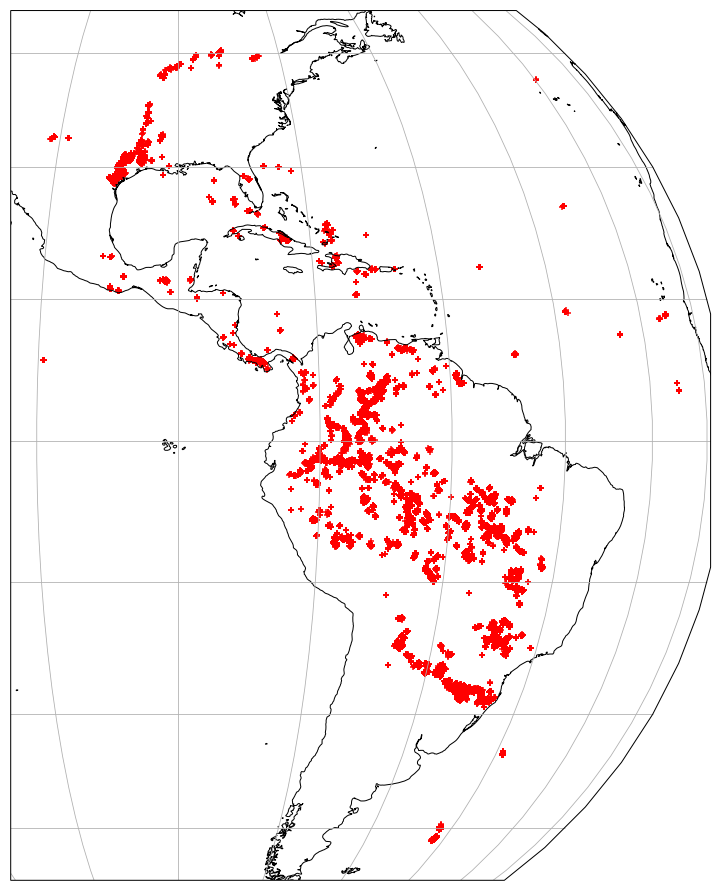

In [3]:
# Plot markers
fig, ax = plt.subplots(figsize=(16,16),
        subplot_kw=dict(
            projection=ccrs.Orthographic(central_longitude=-90.0)))
ax.coastlines(resolution='50m')
ax.gridlines()
ax.scatter([point.x for point in glm_points],
       [point.y for point in glm_points],
       transform=ccrs.Geodetic(),marker="+",facecolor='red')